In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [55]:
data = pd.read_csv('data/drugs.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [56]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [57]:
for col in data.columns:
    print(data[col].unique())

[23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]
['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']
[25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 13.935 13.597 15.478 23.091 17.211
 16.594 15.156 29.45  29.271 15.015 11.424 38.247 25.395 35.639 16.725
 11.871 12.854 13.127  8.966 28.294  8.968 11.953 20.013  9.677 

In [58]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


<Axes: >

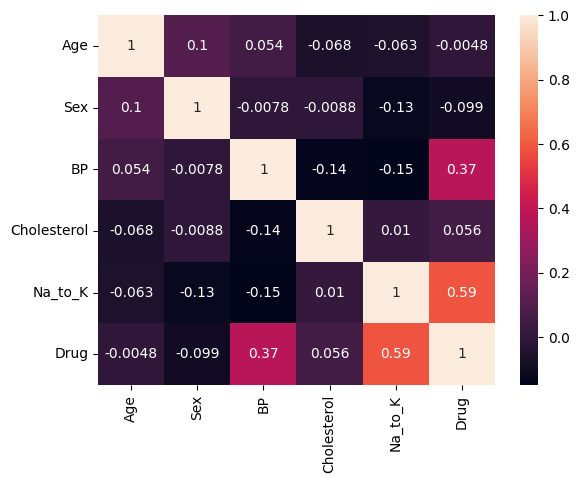

In [59]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
x = data.drop(columns=['Drug','Sex'])
y = data['Drug']

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int32

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [63]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

model = DecisionTreeClassifier()
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [64]:
y_pred = model.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score

print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Confusion Matrix: [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
Accuracy Score: 1.0


[Text(0.625, 0.9, 'x[3] <= 14.829\ngini = 0.68\nsamples = 160\nvalue = [17, 13, 11, 43, 76]'),
 Text(0.5, 0.7, 'x[1] <= 0.5\ngini = 0.656\nsamples = 84\nvalue = [17, 13, 11, 43, 0]'),
 Text(0.5625, 0.8, 'True  '),
 Text(0.25, 0.5, 'x[0] <= 50.5\ngini = 0.491\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[1] <= 1.5\ngini = 0.324\nsamples = 54\nvalue = [0, 0, 11, 43, 0]'),
 Text(0.625, 0.3, 'x[2] <= 0.5\ngini = 0.499\nsamples = 23\nvalue = [0, 0, 11, 12, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 76\nvalue = [0, 0, 0, 0, 76]'),
 Text(0.6875, 0.8, '  False')]

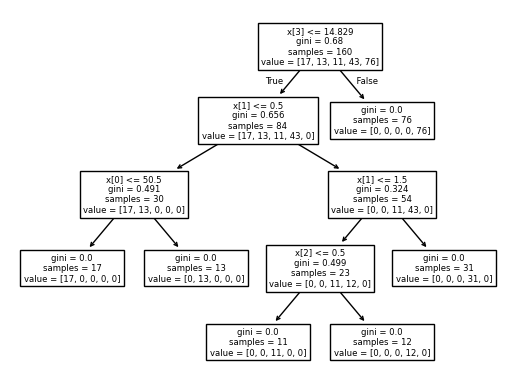

In [66]:
plot_tree(model)